In [1]:
import networkx as nx
import json
%matplotlib inline

In [2]:
graph_final_file = open("graph_final.json")
graph = dict((int(k), v)for k, v in json.load(graph_final_file).items())
graph_final_file.close()

In [3]:
def make_graph(user_id_1, uid2friends):
    """Dict with list of friends is created."""
    #List of friends is added to dictionary uid2friends.
    if user_id_1 not in uid2friends:
        get_friends_ids(user_id_1, uid2friends)
        sleep(0.3)

    friends_ids = set(uid2friends[user_id_1])
    for uid in friends_ids:
        #Check if list if friends for uid hadn't been received.
        if uid in uid2friends:
            continue
        get_friends_ids(uid, uid2friends)
        sleep(0.3)

In [4]:
def make_graph_for_user(user_id_1, uid2friends):
    """Graph of VK friends is being made."""
    graph = nx.Graph()
    graph.add_node(user_id_1)
    friends_ids = set(uid2friends[user_id_1])
    for friend_id in friends_ids:
        graph.add_edge(user_id_1, friend_id)
        friends_ids_2nd_gen = uid2friends[friend_id]
        for friend_id_2nd_gen in friends_ids_2nd_gen:
            if friend_id_2nd_gen in friends_ids:
                graph.add_edge(friend_id_2nd_gen, friend_id)
    return graph

In [5]:
def draw_graph(graph, uid):
    nx.draw_circular(graph, node_color='red', node_size=500, with_labels=False)

## Social graph of real user

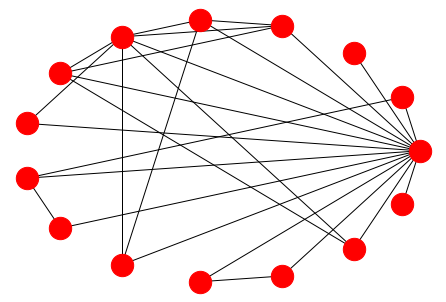

In [6]:
make_graph(645333001, graph)
graph_1 = make_graph_for_user(645333001, graph)
draw_graph(graph_1, 645333001)

## Social graph of social bot

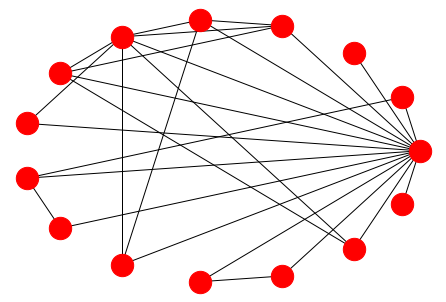

In [7]:
make_graph(651848156, graph)
graph_1 = make_graph_for_user(645333001, graph)
draw_graph(graph_1, 645333001)